# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# IMPORTING DATA

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# EDA

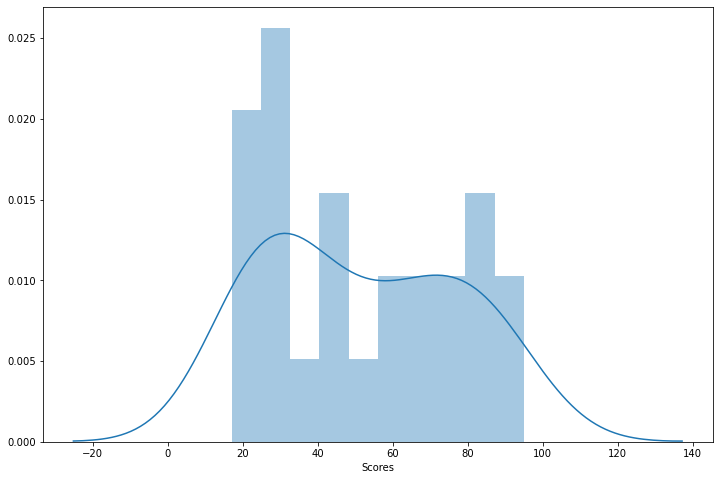

In [21]:
plt.figure(figsize=(12,8))
sns.distplot(df['Scores'],bins=10)

<Figure size 720x576 with 0 Axes>

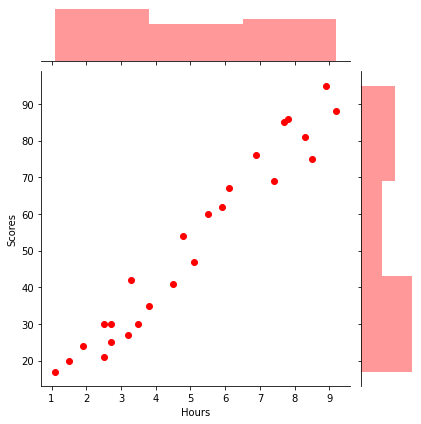

In [22]:
plt.figure(figsize=(10,8))
sns.jointplot(x='Hours',y='Scores',data=df,kind='scatter',color='red')

<Figure size 720x576 with 0 Axes>

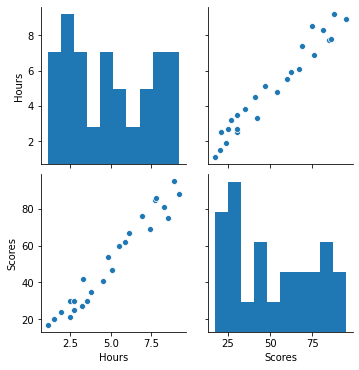

In [24]:
plt.figure(figsize=(10,8))
sns.pairplot(df)

# TRAIN TEST SPLIT

In [56]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Creating And Training Model

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lm = LinearRegression()

In [62]:
lm.fit(X_train,y_train)

LinearRegression()

# Model Evaluation

In [63]:
print(lm.intercept_)

2.7900030887823632


In [64]:
print(lm.coef_)

[9.73611055]


# Predictions from our Model

In [67]:
predictions = lm.predict(X_test)

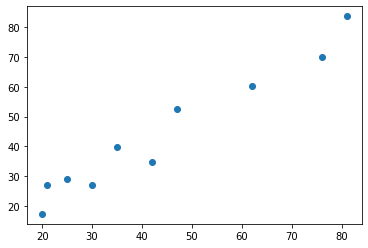

In [78]:
plt.scatter(y_test,predictions)

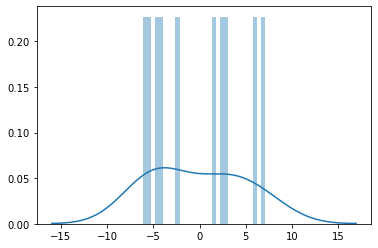

In [79]:
sns.distplot((y_test-predictions),bins=30)

In [80]:
# Comparing Actual vs Predicted
final = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
final 

,Actual,Predicted
0,81,83.599721
1,30,27.130279
2,21,27.130279
3,76,69.969166
4,62,60.233055
5,25,29.077502
6,42,34.919168
7,47,52.444167
8,35,39.787223
9,20,17.394169


# Regression Metrics

In [82]:
from sklearn import metrics

In [83]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.339305426856289
MSE: 21.8178240191192
RMSE: 4.67095536471065


# Predicting score of a student who studies for 9.25 hr/day

In [91]:
hours = 9.25
pred = lm.predict([[hours]])

In [92]:
pred

array([92.84902569])